In [1]:
import pandas as pd
pd.set_option('max_rows',200)
pd.set_option('max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
deliveries = pd.read_csv('../input/deliveries.csv')
matches = pd.read_csv('../input/matches.csv')

# Analysis of matches 

###### Filling nan values

In [3]:
matches.city.fillna('unknown',inplace=True)
matches.winner.fillna('draw',inplace=True)
matches.player_of_match.fillna('draw',inplace=True)

###### Counting 

In [4]:
matches.count()

id                 577
season             577
city               577
date               577
team1              577
team2              577
toss_winner        577
toss_decision      577
result             577
dl_applied         577
winner             577
win_by_runs        577
win_by_wickets     577
player_of_match    577
venue              577
umpire1            577
umpire2            577
umpire3              0
dtype: int64

###### Maximum Man of the matches 

In [5]:
matches.groupby(matches.player_of_match).player_of_match.count().sort_values(ascending=False).head(5)

player_of_match
CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
SK Raina          13
Name: player_of_match, dtype: int64

###### Total matches played by a team

In [6]:
teams = matches.team1.append(matches.team2)
teams_df = pd.DataFrame(teams)
teams_df.columns = ['team']
count_match_series = teams_df.groupby(teams_df.team).team.count()
count_match_df = pd.DataFrame(count_match_series)
count_match_df.columns = ['countplayed']
count_match_df.reset_index(inplace=True)
count_match_df.sort_values('team')
team_sorted = count_match_df.team
played_sorted = count_match_df.countplayed

In [7]:
count_match_df

,team,countplayed
0,Chennai Super Kings,131
1,Deccan Chargers,75
2,Delhi Daredevils,133
3,Gujarat Lions,16
4,Kings XI Punjab,134
5,Kochi Tuskers Kerala,14
6,Kolkata Knight Riders,132
7,Mumbai Indians,140
8,Pune Warriors,46
9,Rajasthan Royals,118


###### Total matches won by a team 

In [8]:
winner_series = matches.groupby(matches.winner).winner.count()
winner_df = pd.DataFrame(winner_series)
winner_df.columns = ['countwin']
winner_df.reset_index(inplace=True)
win_sorted = winner_df.countwin

In [9]:
winner_df

,winner,countwin
0,Chennai Super Kings,79
1,Deccan Chargers,29
2,Delhi Daredevils,56
3,Gujarat Lions,9
4,Kings XI Punjab,63
5,Kochi Tuskers Kerala,6
6,Kolkata Knight Riders,68
7,Mumbai Indians,80
8,Pune Warriors,12
9,Rajasthan Royals,63


###### Total matches lost by a team

In [10]:
total_losses = played_sorted - win_sorted
loss_df = pd.DataFrame(total_losses)
team_df = pd.DataFrame(team_sorted)
loss_df = pd.concat((loss_df,team_df),axis=1)
loss_df.columns = ['loss_count','team']
loss_df.sort_values('loss_count',ascending=False)

,loss_count,team
2,77.0,Delhi Daredevils
4,71.0,Kings XI Punjab
11,69.0,Royal Challengers Bangalore
6,64.0,Kolkata Knight Riders
7,60.0,Mumbai Indians
9,55.0,Rajasthan Royals
0,52.0,Chennai Super Kings
1,46.0,Deccan Chargers
8,34.0,Pune Warriors
12,28.0,Sunrisers Hyderabad


### TOSS Related Analysis

###### Total toss won by a team

In [11]:
matches.groupby(matches.toss_winner).toss_winner.count()

toss_winner
Chennai Super Kings            66
Deccan Chargers                43
Delhi Daredevils               64
Gujarat Lions                   8
Kings XI Punjab                64
Kochi Tuskers Kerala            8
Kolkata Knight Riders          69
Mumbai Indians                 74
Pune Warriors                  20
Rajasthan Royals               63
Rising Pune Supergiants         7
Royal Challengers Bangalore    61
Sunrisers Hyderabad            30
Name: toss_winner, dtype: int64

###### Batting or bowling first after winning toss

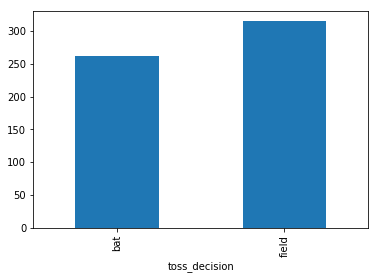

In [12]:
choice_series = matches.groupby(matches.toss_decision).toss_decision.count()
choice_series.plot(kind='bar')

###### Batting First Wins vs Batting Second Wins After Winning Toss

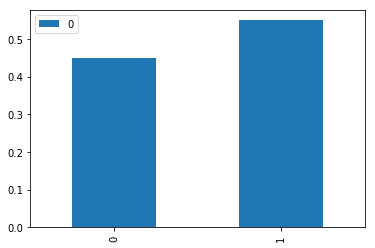

In [13]:
condition = matches.toss_decision =='bat'
df1 = matches.loc[condition,:]
df2 = matches.loc[~condition,:]

percentage_when_batting_first_won  = (df1.toss_winner == df1.winner).mean()
percentage_when_fielding_first_won = (df2.toss_winner == df2.winner).mean()
df = pd.DataFrame([percentage_when_batting_first_won,percentage_when_fielding_first_won])
df.plot(kind='bar')

# Analysis of Deliveries

###### Filling missing values

In [14]:
deliveries.dismissal_kind.fillna('notout',inplace=True)
deliveries.player_dismissed.fillna('notout',inplace=True)
deliveries.fielder.fillna('notout',inplace=True)

###### Counting 

In [15]:
deliveries.count()

match_id            136598
inning              136598
batting_team        136598
bowling_team        136598
over                136598
ball                136598
batsman             136598
non_striker         136598
bowler              136598
is_super_over       136598
wide_runs           136598
bye_runs            136598
legbye_runs         136598
noball_runs         136598
penalty_runs        136598
batsman_runs        136598
extra_runs          136598
total_runs          136598
player_dismissed    136598
dismissal_kind      136598
fielder             136598
dtype: int64

###### Dismissals kind

In [16]:

deliveries.dismissal_kind.unique()

array(['notout', 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

### Bowling Analysis

###### Total wickets between differnt overs

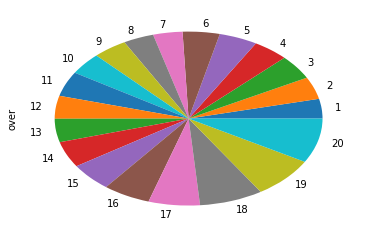

In [17]:
condition = (deliveries.dismissal_kind != 'run out')&(deliveries.dismissal_kind != 'retired hurt')&(deliveries.dismissal_kind != 'notout')
df = deliveries.loc[condition,:]
df.groupby([df.over]).over.count().plot(kind='pie')

###### Total runs conceded by a team in all seasons 

In [18]:
#deliveries.groupby(deliveries.bowling_team).total_runs.sum()

###### Maximum type of dismissals

In [19]:
out_series = deliveries.groupby(deliveries.dismissal_kind).dismissal_kind.count()
out_df = pd.DataFrame(out_series).sort_values('dismissal_kind')
out_df

,dismissal_kind
dismissal_kind,
obstructing the field,1
hit wicket,8
retired hurt,8
caught and bowled,187
stumped,222
lbw,399
run out,697
bowled,1251
caught,3954


###### Total runs conceded per ball by different bowlers 

In [20]:
#deliveries.groupby(deliveries.bowler).total_runs.mean().sort_values()

###### Total wickets taken by bowler excluding run out and retired hurt

In [21]:
condition = (deliveries.dismissal_kind != 'run out')&(deliveries.dismissal_kind != 'retired hurt')&(deliveries.dismissal_kind != 'notout')
df = deliveries.loc[condition,:]
#df.groupby(df.bowler).over.count().sort_values(ascending=False)

###### Maximum wickets taken in death overs excluding run outs and retired hurt

In [22]:
condition = (deliveries.over > 15) &(deliveries.dismissal_kind != 'run out')&(deliveries.dismissal_kind != 'retired hurt')&(deliveries.dismissal_kind != 'notout')
df = deliveries.loc[condition,:]
#df.groupby(df.bowler).over.count().sort_values(ascending=False)

###### Minimum runs conceded in death overs per ball 

In [23]:
#Including only those bowlers that have bowled atleast 15 death overs
del_series = deliveries.groupby(deliveries.bowler).total_runs.count()
del_df = pd.DataFrame(del_series).reset_index()
del_df.columns = ['bowler','delivery']
bowlers = del_df.loc[del_df.delivery >=90,:].bowler

In [24]:

condition = (deliveries.over > 15) & (deliveries.bowler.isin(bowlers))
df = deliveries.loc[condition,:]
df.groupby(df.bowler).total_runs.mean().sort_values().head(10)

bowler
PD Collingwood     0.913043
A Chandila         1.000000
KC Cariappa        1.000000
GJ Maxwell         1.000000
KMDN Kulasekara    1.066667
Sohail Tanvir      1.140187
S Gopal            1.142857
BCJ Cutting        1.166667
A Zampa            1.200000
SL Malinga         1.203285
Name: total_runs, dtype: float64

### Batsman

###### Total runs socred  by a different team in all seasons

In [25]:
#deliveries.groupby(deliveries.batting_team).total_runs.sum()

###### Total runs scored in different overs

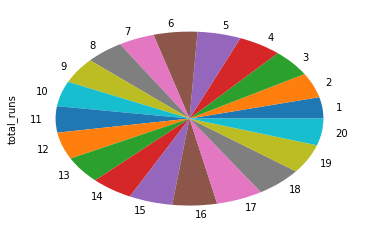

In [26]:
deliveries.groupby([deliveries.over]).total_runs.sum().plot(kind='pie')

###### Total runs scored by diffrent batsman 

In [27]:
#deliveries.groupby(deliveries.batsman).batsman_runs.sum().sort_values(ascending=False)

###### Total runs scored by different batsman while chasing

In [28]:
df = deliveries.loc[deliveries.inning == 2 ,:]
#df.groupby(deliveries.batsman).batsman_runs.sum().sort_values(ascending=False)

###### Total runs scored by Virat Kohli / Any Batsman against various teams 

In [29]:
df = deliveries.loc[deliveries.batsman == 'V Kohli',:]
#df.groupby(df.bowling_team).batsman_runs.sum().sort_values(ascending=False)

###### Total runs scored by Virat Kohli / Any Batsman against all the bowlers 

In [30]:
df = deliveries.loc[deliveries.batsman == 'V Kohli',:]
#df.groupby(df.bowler).batsman_runs.sum().sort_values(ascending=False)

#Interesting find --Among top seven, six of them are indians----

###### Maximum centuries scored by a batsman 

In [31]:
runs_series = deliveries.groupby([deliveries.match_id,deliveries.batsman]).total_runs.sum()
runs_df = pd.DataFrame(runs_series)
runs_df = runs_df.reset_index()
condition = runs_df.total_runs >= 100
player_100df = runs_df.loc[condition,:]
player_100df.groupby(player_100df.batsman).total_runs.count().sort_values(ascending=False).head(5)

batsman
CH Gayle          7
V Kohli           5
SK Raina          3
V Sehwag          3
AB de Villiers    3
Name: total_runs, dtype: int64

### FIELDERS

###### Best Fielder in terms of runout 

In [32]:
condition = deliveries.dismissal_kind == 'run out'
df = deliveries.loc[condition,:]
#df.groupby(df.fielder).batsman.count().sort_values(ascending=False)

###### Best Fielder in terms of catches

In [33]:
condition = (deliveries.dismissal_kind == 'caught and bowled') |(deliveries.dismissal_kind == 'caught')
df = deliveries.loc[condition,:]
#df.groupby(df.fielder).batsman.count().sort_values(ascending=False)

###### Best Keeper in terms of catching and stumping

In [34]:
condition = (deliveries.dismissal_kind == 'stumped')
df = deliveries.loc[condition,:]
#df.groupby(df.fielder).batsman.count().sort_values(ascending=False)

# Analysis on Joining Table 

In [35]:
combined = deliveries.set_index('match_id').join(matches.set_index('id'),how='inner')

###### Best fielders in terms of catches seasonwise

In [36]:
condition = combined.fielder != 'notout'
df = combined.loc[condition,:]
fielders_df = df.groupby([df.season,df.fielder]).non_striker.count()
fielders_df = pd.DataFrame(fielders_df)
fielders_df = fielders_df.reset_index()

In [37]:
condition = fielders_df.season == 2013
fielders_df.loc[condition,:].sort_values('non_striker',ascending=False).head(2)

,season,fielder,non_striker
817,2013,MS Dhoni,19
864,2013,SV Samson,15


###### Best Batsman in terms of season

In [38]:
runs_series = combined.groupby([combined.season,combined.batsman]).total_runs.sum()
runs_df = pd.DataFrame(runs_series)
runs_df.reset_index(inplace=True)

In [39]:
condition = runs_df.season == 2016
runs_df.loc[condition,:].sort_values('total_runs',ascending=False).head(5)

,season,batsman,total_runs
1383,2016,V Kohli,998
1278,2016,DA Warner,884
1256,2016,AB de Villiers,714
1357,2016,S Dhawan,523
1288,2016,G Gambhir,520


###### Best Wicket tackers in terms of season

In [40]:
condition = (combined.dismissal_kind != 'run out')&(combined.dismissal_kind != 'retired hurt')&(combined.dismissal_kind != 'notout')
df = combined.loc[condition,:]
wicket_series = df.groupby([df.season,df.bowler]).non_striker.count()
wicket_df = pd.DataFrame(wicket_series)
wicket_df.reset_index(inplace=True)

In [41]:
condition = wicket_df.season == 2016
wicket_df.loc[condition,:].sort_values('non_striker',ascending=False).head(5)

,season,bowler,non_striker
773,2016,B Kumar,23
847,2016,YS Chahal,21
836,2016,SR Watson,20
784,2016,DS Kulkarni,18
814,2016,Mustafizur Rahman,17


###### 4 Wicket in a single match season wise

In [42]:
condition = (combined.season==2016)&(combined.dismissal_kind != 'run out')&(combined.dismissal_kind != 'retired hurt')&(combined.dismissal_kind != 'notout')
df = combined.loc[condition,:]
wicket_series = df.groupby([df.index,df.bowler]).non_striker.count()
wicket_df = pd.DataFrame(wicket_series)
wicket_df.reset_index(inplace=True)

In [43]:
wicket_df.columns= ['match_id','bowler','wicket']
condition = wicket_df.wicket >= 4
wicket_df = wicket_df.loc[condition,:].sort_values('wicket',ascending=False)
wicket_df

,match_id,bowler,wicket
236,557,A Zampa,6
12,520,DJ Bravo,4
35,524,A Mishra,4
51,526,MJ McClenaghan,4
80,532,B Kumar,4
162,545,AR Patel,4
190,549,AD Russell,4
258,560,MP Stoinis,4
261,561,CJ Jordan,4
296,567,YS Chahal,4


In [44]:
df = pd.DataFrame(wicket_df.groupby(wicket_df.bowler).wicket.count().sort_values(ascending=False))
df.columns = ['4 Wickets']
df.reset_index()

,bowler,4 Wickets
0,YS Chahal,1
1,SR Watson,1
2,R Ashwin,1
3,MP Stoinis,1
4,MJ McClenaghan,1
5,DS Kulkarni,1
6,DR Smith,1
7,DJ Bravo,1
8,CJ Jordan,1
9,B Kumar,1


###### Best economic bowler season wise ( minimum 10 overs bowled)

In [45]:
#Filtering bowlers according to season
condition = combined.season == 2015
df = combined.loc[condition,:]

In [46]:
#Filtering bowlers that bowled minimum 60 balls
bowler_series = df.groupby([df.bowler]).total_runs.count()
bowler_df = pd.DataFrame(bowler_series)
bowler_df.columns = ['balls']
bowler_df = bowler_df.loc[bowler_df.balls >= 60,:]

In [47]:
condition = df.bowler.isin(bowler_df.index)
df2 = df.loc[condition,:]
df3 = pd.DataFrame(df2.groupby([df2.bowler]).total_runs.mean().sort_values().head(10))

In [48]:
df3.columns = ['Economy']
df3.reset_index()

,bowler,Economy
0,R Ashwin,0.954167
1,Z Khan,1.025806
2,MC Henriques,1.044586
3,MA Starc,1.125000
4,Sandeep Sharma,1.154341
5,GB Hogg,1.165354
6,A Nehra,1.176623
7,JP Duminy,1.196262
8,SL Malinga,1.198413
9,S Aravind,1.200000
